# Evaluate the model

## Copyright notice

This version (c) 2018 Fabian Offert, license: [CC-BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)

## Imports

Please refer to the [README.md](README.md) for proper installation of the dependencies listed here.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import os
from IPython.display import clear_output, Image, display
import PIL.Image
from tqdm import tqdm_notebook

# from inception_v1 import preprocess_input
from keras.applications.inception_v3 import preprocess_input

from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array, array_to_img

Using TensorFlow backend.


## Settings

- `model_file`: Which model to test
- `size`: Size of the input image for the chosen architecture (InceptionV3: 299x299)
- `tops`: How many top scoring images to compute/show.
- `class_to_test`: Which class to generate top-scoring images for.
- `test_dir`: Directory that holds the complete dataset.

In [2]:
model_file = 'portrait-landscape-stilllife-v3-10.hdf5'
size = (299, 299)
tops = 3
class_to_test = 0
test_dir = 'wga'

## Prediction function

This converts an image into a format that the model can process and computes the prediction score.

In [3]:
def predict(img, model):
    img = img.resize(size)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]

## Top-scoring images

This finds the top-socring images in the whole dataset for a selected class.

In [ ]:
# Full image test on full dataset
model = load_model(model_file)
topn = np.zeros(shape=(tops))
score_to_file = {}

for file in tqdm_notebook(os.listdir(test_dir)):
    if not file.startswith('.'):
        try: # BUG: one (?) file could not be cast into an array when using full dataset
            img = load_img(test_dir + '/' + file)
            img_array = img_to_array(img)
        except:
            break
        preds = predict(img, model)
        score = preds[class_to_test]
        if score > topn[topn.argmin()]:
            topn[topn.argmin()] = score
            score_to_file[score] = file # Score is always unique!
        
topn = np.sort(topn)

for n in range(topn.shape[0]):
    score = topn[n]
    file = score_to_file[score]
    img = load_img(test_dir + '/' + file)
    display(img)
    print(file, score)

## Score for single file

This calculates the score for a single image file.

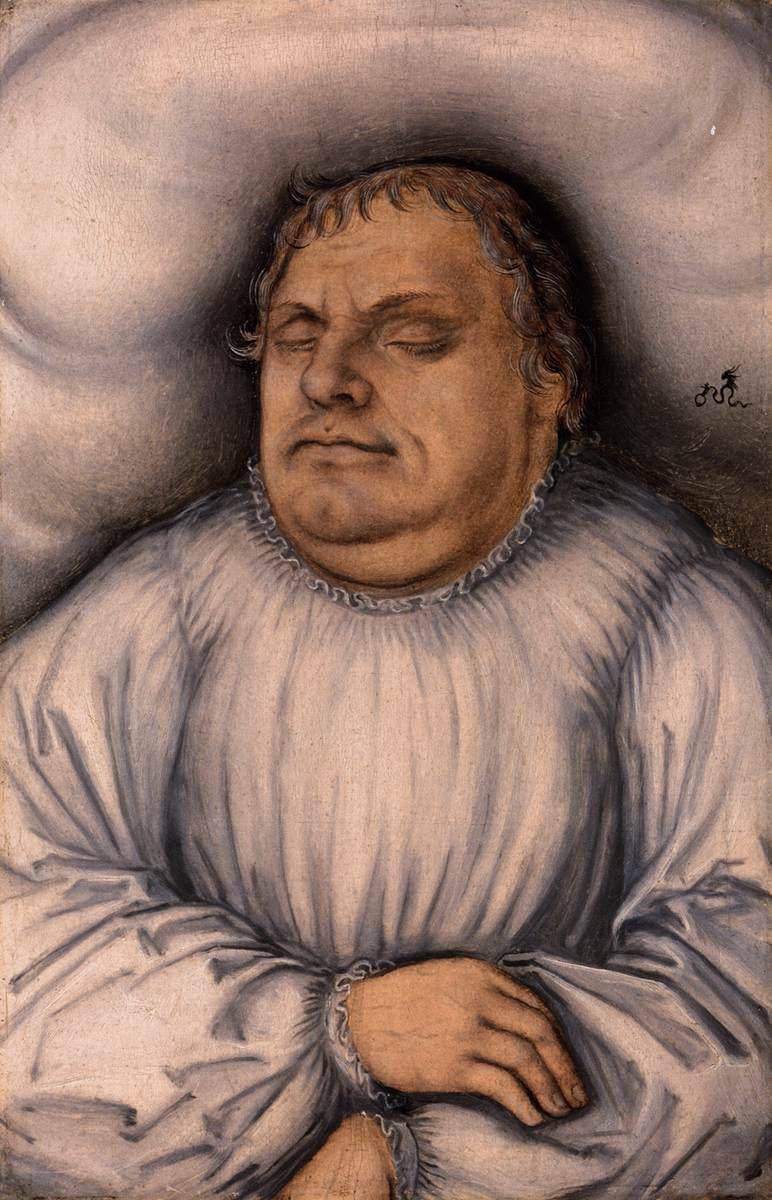

[0.9816657  0.00819328 0.01014105]


In [5]:
# Score single file
file = 'wga/cranach-lucas_y-16luther.jpg'
img = load_img(file)
display(img)
img_array = img_to_array(img)
print(predict(img, model))